In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#import cufflinks as cf
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


data1=pd.read_csv("Data_2017.csv")
data2=pd.read_csv("Data_2018.csv")
data3=pd.read_csv("Data_2019.csv")

In [2]:
p_id1=data1['pollutant_id'].to_list()
date1=data1['date_time'].to_list()
p_value1=data1['pollutant_value'].to_list()

p_id2=data2['pollutant_id'].to_list()
date2=data2['date_time'].to_list()
p_value2=data2['pollutant_value'].to_list()

p_id3=data3['pollutant_id'].to_list()
date3=data3['date_time'].to_list()
p_value3=data3['pollutant_value'].to_list()

p_id=p_id1+p_id2+p_id3
date=date1+date2+date3
p_value=p_value1+p_value2+p_value3

date=[date[i] for i in range(len(p_id)) if(p_id[i]==6)]
CO_2017=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6)]

for i in range(len(CO_2017)):
    if (CO_2017[i]=='BDL'):
        CO_2017[i]='nan'
    else:
        pass

for i in range(len(CO_2017)):
    if (CO_2017[i]=='nan'):
        CO_2017[i]='0'
    else:
        pass

        
#CO_2017=[int(CO_2017[i]) for i in range(len(CO_2017))]    
data=[[date[i], CO_2017[i]] for i in range(len(date))] 
data= pd.DataFrame(data, columns = ['Date', 'CO'])
data["CO"] = pd.to_numeric(data["CO"], downcast="float")
column_means = data['CO'].mean()
data['CO'].fillna(column_means)

data.shape

(210240, 2)

In [3]:
data1=data
data1['Date'] = pd.to_datetime(data1['Date'])
data1=data1.set_index('Date')

In [4]:
data1['Month']=data1.index.month
data1['Day_of_week']=data1.index.dayofweek
data1['Day']=data1.index.day
data1['Hour']=data1.index.hour
data1['Year']=data1.index.year
data1.head()
data5=data1
data5.tail()

,CO,Month,Day_of_week,Day,Hour,Year
Date,,,,,,
2019-12-31 19:00:00,1665.099976,12,1,31,19,2019
2019-12-31 20:00:00,2269.500000,12,1,31,20,2019
2019-12-31 21:00:00,2996.699951,12,1,31,21,2019
2019-12-31 22:00:00,2517.300049,12,1,31,22,2019
2019-12-31 23:00:00,1723.000000,12,1,31,23,2019


## Determining  Skewness and Curtosis of Data

In [5]:
from scipy.stats import skew,kurtosis
skew(data1['CO'].dropna())

3.7431626319885254

In [6]:
import numpy as np
kurtosis(data1['CO'].dropna())

25.936581574330027

In [7]:
L=np.random.normal(0,1,1000)

## Data Visualization ##

<AxesSubplot:xlabel='Date', ylabel='CO'>

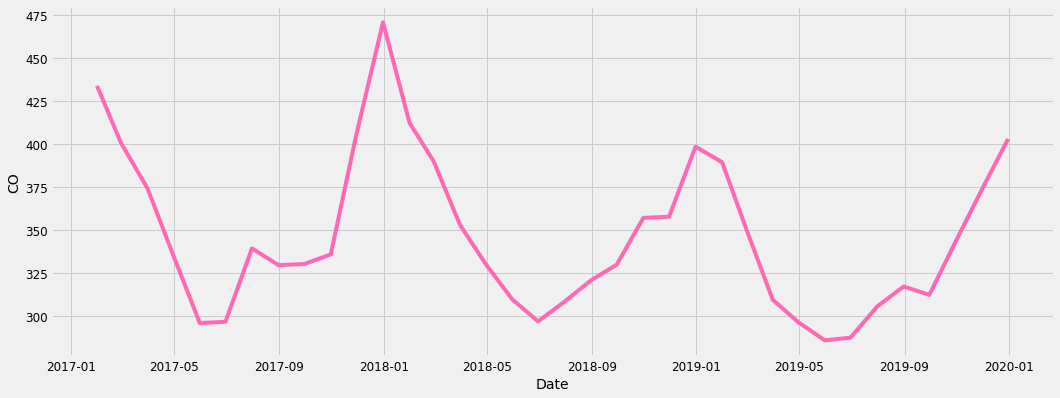

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
data_by_month=data1.resample('M').mean()
fig= plt.figure(figsize=(16,6))
#colors = ['lightpink','pink','fuchsia','mistyrose','hotpink','deeppink','magenta']
sns.lineplot(x=data_by_month.index,y='CO',data=data_by_month,color='hotpink')

<AxesSubplot:xlabel='Month', ylabel='CO'>

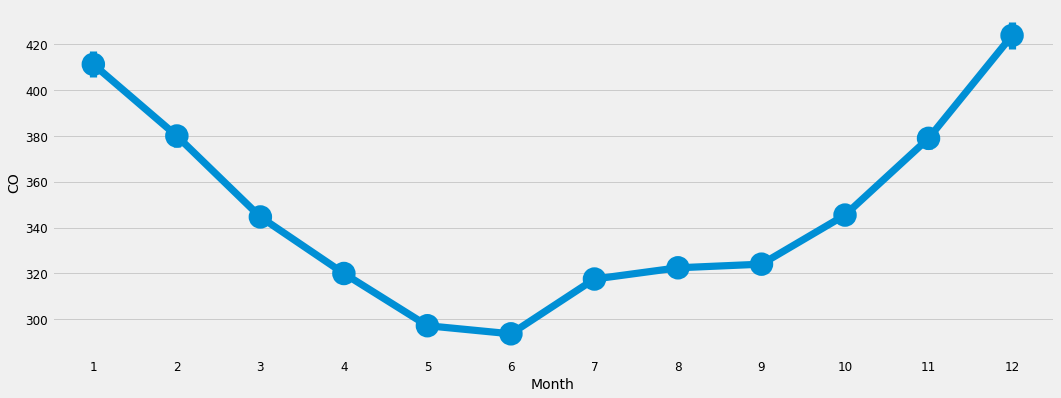

In [9]:
fig= plt.figure(figsize=(16,6))
sns.pointplot(data=data1,x='Month',y='CO',colr='magenda')

<AxesSubplot:xlabel='Hour', ylabel='CO'>

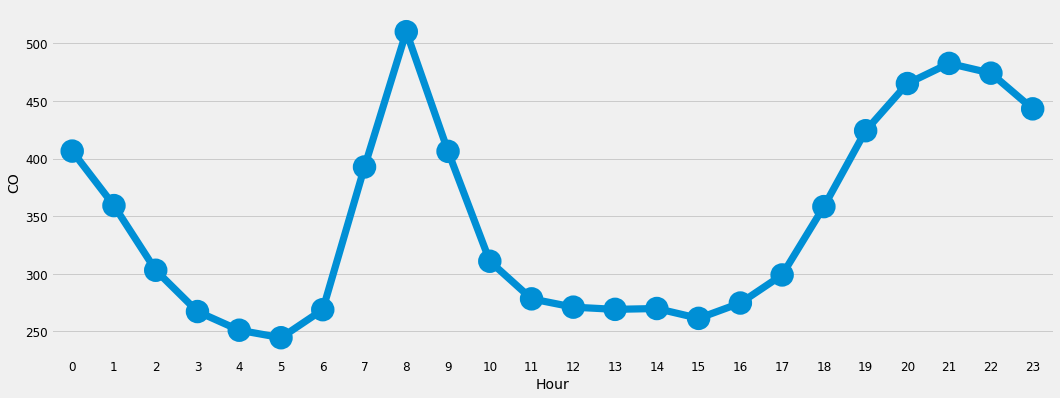

In [10]:
fig= plt.figure(figsize=(16,6))
sns.pointplot(data=data1,x='Hour',y='CO')

As expected, the CO concentration is higher during morning hours and evening hours, attributed to high traffic during those hours.

<AxesSubplot:xlabel='Day_of_week', ylabel='CO'>

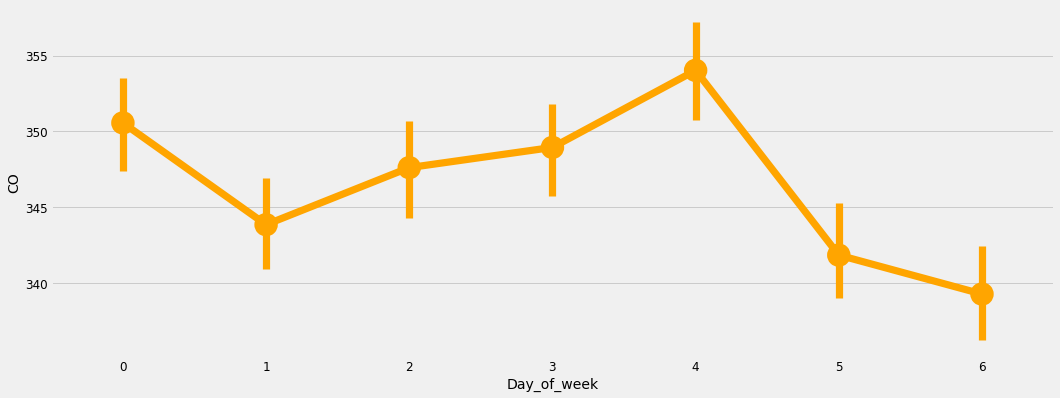

In [11]:
fig= plt.figure(figsize=(16,6))
sns.pointplot(data=data1,x='Day_of_week',y='CO',color='orange')

<AxesSubplot:xlabel='CO', ylabel='Count'>

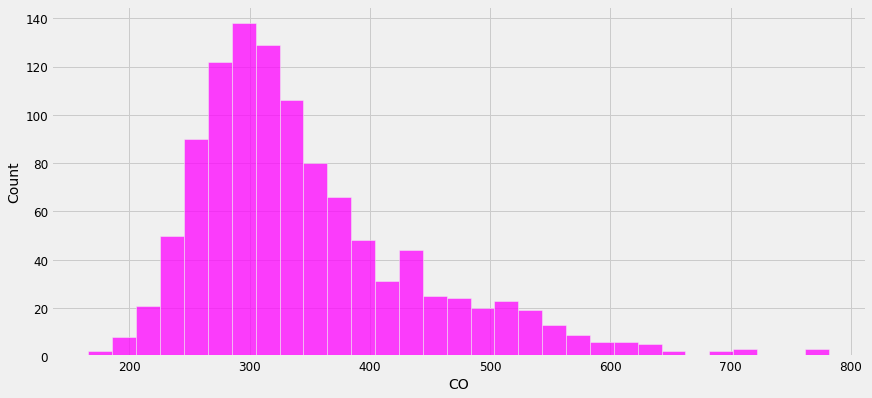

In [12]:
fig= plt.figure(figsize=(13,6))
data2=data1.resample('D').mean()
sns.histplot(data2, x="CO",color='fuchsia')

<Figure size 936x432 with 0 Axes>

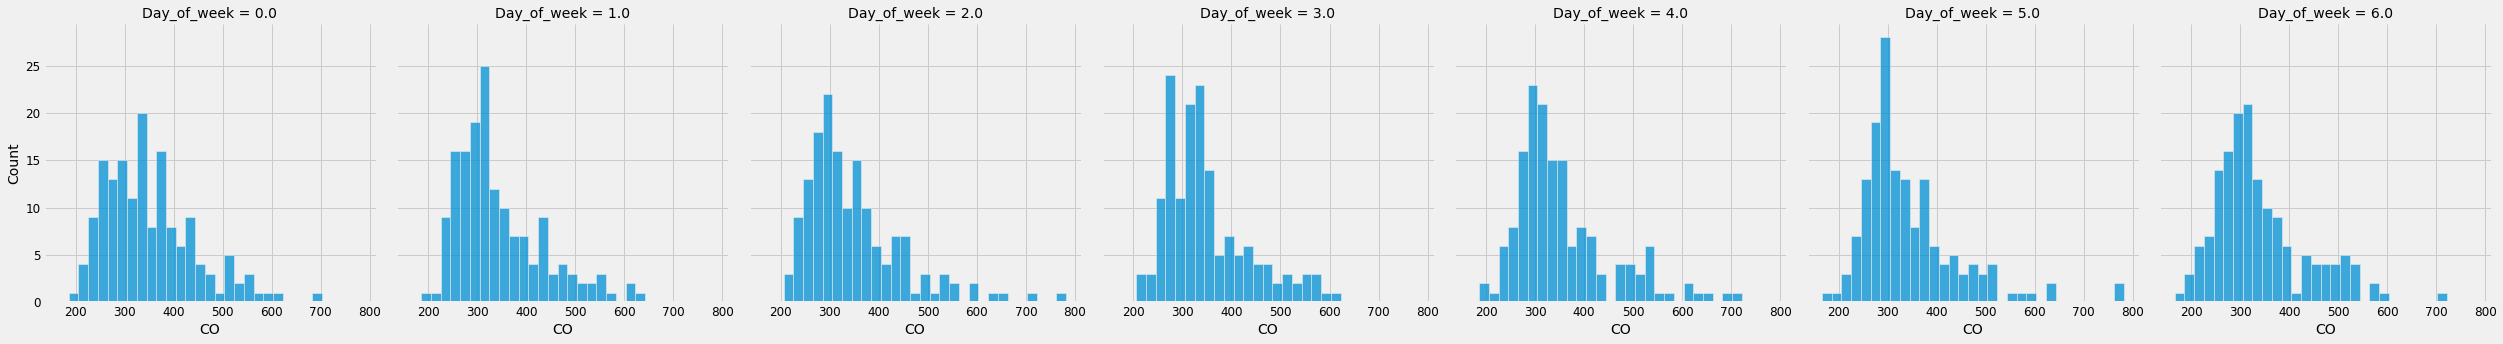

In [13]:
fig= plt.figure(figsize=(13,6))
sns.displot(data2, x="CO", col="Day_of_week",multiple="dodge")

<AxesSubplot:xlabel='Month', ylabel='CO'>

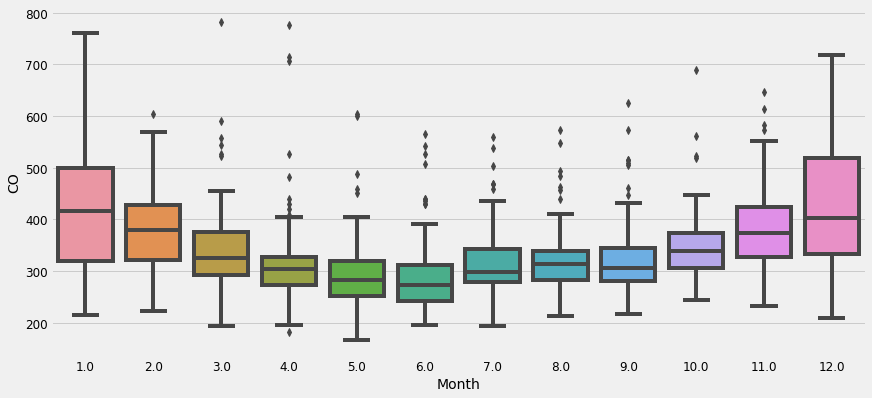

In [14]:
fig= plt.figure(figsize=(13,6))
sns.boxplot(data=data2, x='Month', y='CO')

## Time Series Lag Plot ##
A lag plot helps to check if a time series data set is random or not. A random data will be evenly spread whereas a shape or trend indicates the data is not random.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

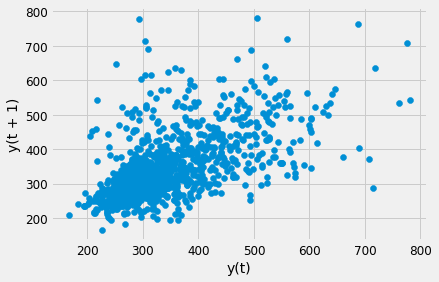

In [15]:
pd.plotting.lag_plot(data2['CO'])

In [16]:
#Printing the date upto period 'Day'
data['Date'] = pd.to_datetime(data['Date']).dt.to_period('H')
#Drops all rows with missing values
#data=data.dropna()
#Setting the date column as an index column to allow resampling
data=data.set_index('Date')
#Resampling data to give only the mean daily CO concentrations
data=data.resample('D').mean()

data['date'] = data.index
#data['date'] = pd.to_datetime(data['date']).dt.to_period('D')
#mean_value=data['CO'].mean()
data=data.fillna(column_means)
data.head()


,CO,date
Date,,
2017-01-01,470.245972,2017-01-01
2017-01-02,512.894531,2017-01-02
2017-01-03,296.407288,2017-01-03
2017-01-04,302.471497,2017-01-04
2017-01-05,220.845215,2017-01-05


In [17]:
CO  =data['CO'].to_list()
date=data['date'].to_list()
CO=pd.Series(CO,date)
CO2017=list(CO['2017'])
CO2018=list(CO['2018'])
CO2019=list(CO['2019'])
a_dict = {'Date':CO.index[:365],
    "2017":CO2017,
                  "2018":CO2018,"2019":CO2019}
df = pd.DataFrame(a_dict)
df=df.set_index('Date')
df['Day_of_week']=df.index.dayofweek
df.head()

,2017,2018,2019,Day_of_week
Date,,,,
2017-01-01,470.245972,375.883850,415.435516,6
2017-01-02,512.894531,550.797729,300.007111,0
2017-01-03,296.407288,358.899994,319.485382,1
2017-01-04,302.471497,318.951843,316.105865,2
2017-01-05,220.845215,333.370667,265.206879,3


<Figure size 1120x480 with 0 Axes>

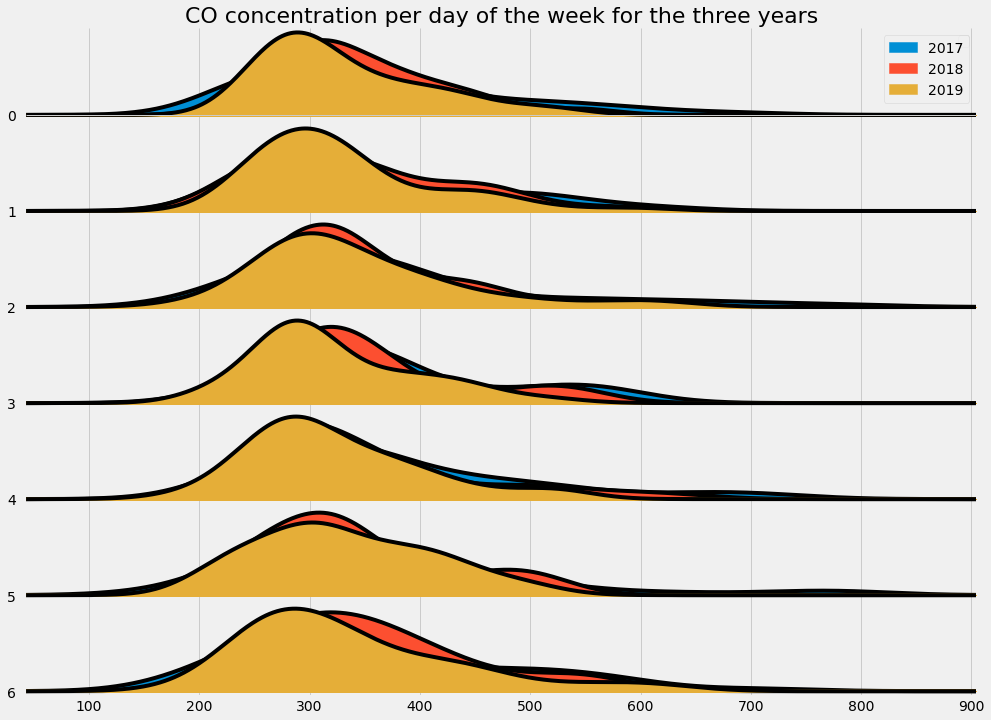

In [18]:
import joypy
# Draw Plot
plt.figure(figsize=(14,6), dpi= 80)
fig, axes = joypy.joyplot(df, column=['2017', '2018', '2019'], by="Day_of_week", ylim='own',overlap=0, figsize=(14,10),grid=True, legend=True)

# Decoration
plt.title('CO concentration per day of the week for the three years', fontsize=22)
plt.legend(['2017', '2018', '2019'])
plt.show()

In [19]:
monthly_totals = df.groupby(df.index.month).mean()
monthly_totals.reset_index(inplace=True)


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

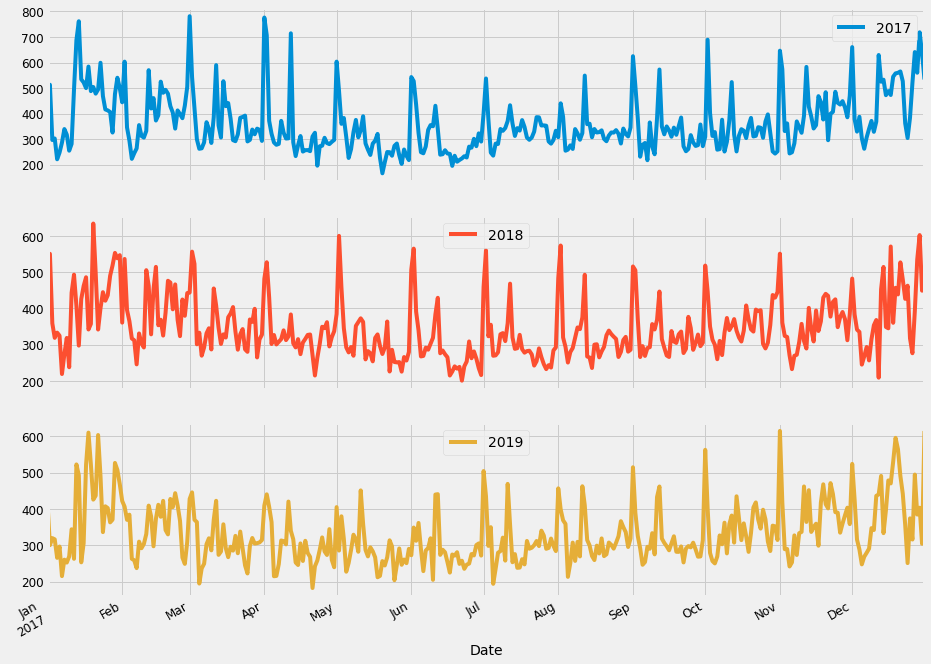

In [20]:
df.drop(['Day_of_week'], axis=1).plot(subplots=True, figsize=(14,12))

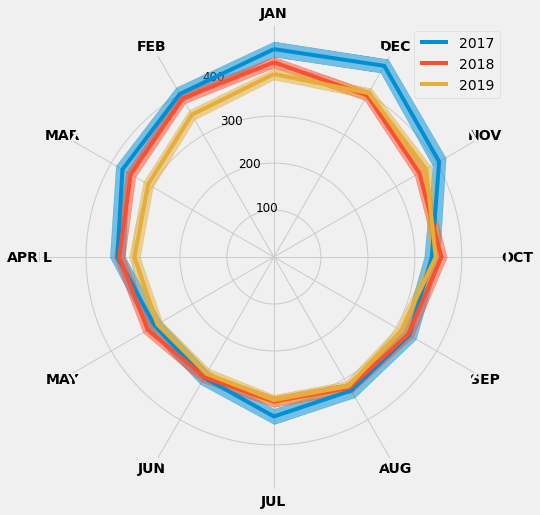

In [21]:
def plot_polar(df, error_alpha=0.5):
    """Plot DataFrame of day-of-week data as a polar plot with shaded regions
    representing S.E.M.
    
    DataFrame should be indexed 0-6 with 0=Monday, 6=Sunday
    """
    # add last row to complete cycle (otherwise plot lines don't connect)
    df = df.append(df.iloc[0, :])
    #convert index to radians
    radians = np.linspace(0, 2 * np.pi, num=12, endpoint=False)
    df.index = [radians[day] for day in df.index]
    plt.figure(figsize=(8, 8))
    ax = plt.axes(polar=True)
    ax.set_theta_zero_location('N')
    # Set up labels
    ax.set_xticks(radians)
    ax.set_xticklabels(['JAN', 'FEB', 'MAR', 'APRIL', 'MAY', 'JUN', 'JUL','AUG','SEP','OCT',
                        'NOV','DEC'], size=14, weight='bold')

    df.plot(ax=ax, lw=4)
    # need to lookup line color for shaded error region
    line_colors = {line.get_label(): line.get_color() for line in ax.get_lines()}
    def plot_errors(series):
        sem = series.sem()
        ax.fill_between(np.append(radians, 0), 
                        series - sem, series + sem,
                        color=line_colors[series.name], alpha=error_alpha)
    df.apply(plot_errors)
    ax.legend( fontsize=14)


plot_polar(monthly_totals.drop(['Date','Day_of_week'], axis=1))

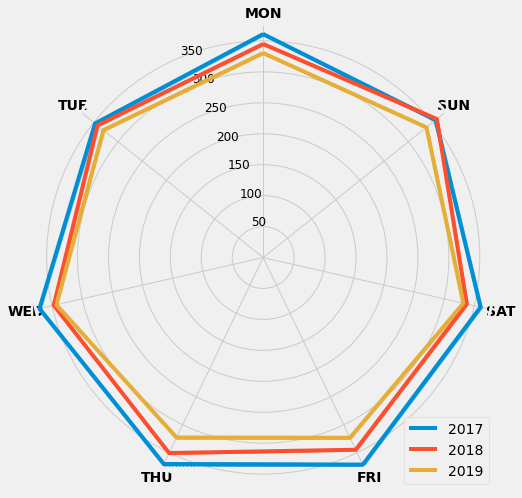

In [22]:
weekly_totals = df.groupby(df.index.dayofweek).mean()
def plot_polar(df, error_alpha=0.5):
    # add last row to complete cycle (otherwise plot lines don't connect)
    df = df.append(df.iloc[0, :])
    #convert index to radians
    radians = np.linspace(0, 2 * np.pi, num=7, endpoint=False)
    df.index = [radians[day] for day in df.index]
    plt.figure(figsize=(8, 8))
    ax = plt.axes(polar=True)
    ax.set_theta_zero_location('N')
    # Set up labels
    ax.set_xticks(radians)
    ax.set_xticklabels(['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], size=14, weight='bold')

    df.plot(ax=ax, lw=4)
    # need to lookup line color for shaded error region
    line_colors = {line.get_label(): line.get_color() for line in ax.get_lines()}
    def plot_errors(series):
        sem = series.sem()
        ax.fill_between(np.append(radians, 0), 
                        series - sem, series + sem,
                        color=line_colors[series.name], alpha=error_alpha)
    df.apply(plot_errors)
    ax.legend(loc=4, fontsize=14)


plot_polar(weekly_totals.drop(['Day_of_week'], axis=1))

In [24]:
#cf.go_offline()
weekly_means = df.groupby(df.index.dayofweek).mean()

weekly_means.iplot(kind = 'bar', x = 'Day_of_week', y ='2017')

AttributeError: 'DataFrame' object has no attribute 'iplot'

In [ ]:
from plotly.offline import iplot
cf.go_offline()
theme=['polar','pearl','ggplot']
year=['2017','2018','2019']
for i in range(3):
    cf.set_config_file(theme=theme[i])
    figsize=(2, 1)
    weekly_means.iplot(kind = 'bar', x = 'Day_of_week', y =year[i], title=year[i])

 ## Checking stationarity of data
 
 To check the stationarity of the TS, we perform two tests.
  1. Rolling statistics (rolling mean and rolling std)
  2. Dickey Fuller(ADCF) test. 
  
  
  ##### Rolling statistics

In [ ]:
rolmean=data.rolling(window=7).mean()
rolstd=data.rolling(window=7).std()
data1

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8)) 
y=data.iloc[:,0]
y.index = y.index.to_timestamp()
plt.plot(y,color='blue',linewidth=2)
plt.plot(rolmean,color='green',linewidth=2)
plt.plot(rolstd,color='red',linewidth=2)
plt.legend(['original data', 'rolling mean','rolling std'], loc='best')
#plt.scatter(y.index,CO, color='blue')
plt.xlabel('Date', fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)', fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show

From the graph, the rolling mean and the rolling standard deviation does not depict an upward trend hence stationary. 


#### Dickey Fuller Test

In [ ]:
#Hypothesis
#H_0 : It is not stationary
#H_1 : It is stationary
from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Test Results:')
dftest=adfuller(data['CO'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test statistic','p-value','#lags Used','Number of Observations'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key]=value
print(dfoutput)

From the results, the p-value<0.05, we reject the null hyphothesis and conclude that the data is stationary. 


In [ ]:
data.head()

In [ ]:
import math
#Deriving the lists of Date and CO columns of the data
Date=data['date'].to_list()
CO  =data['CO'].to_list()
date=[i+1 for i in range(len(CO)) ]
#CO=[math.log(CO[i]) for i in range(len(CO))]
#Generating timeseries data based on the two lists
data1= pd.Series(CO,Date)
CO=pd.Series(CO)

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8)) 
y=data1
y.index = y.index.to_timestamp()
plt.plot(y,color='blue',linewidth=2)
plt.scatter(y.index,CO, color='blue')
plt.xlabel('Date', fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)', fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show

## Decomposing my time series into components

In [ ]:
from sktime.utils.plotting import plot_series
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data1, model='additive')
plot_series(result.trend)
plot_series(result.seasonal)
plot_series(result.resid)



In [ ]:
#Seasonality for 2017 January, we might suspect a weekly seasonality.
plot_series(result.seasonal['2018-07'])
plot_series(result.seasonal['2017-07'])

In [ ]:
resample = result.seasonal.resample('M')
monthly_mean = resample.mean()
plot_series(monthly_mean)

Data is split such that the first 895days is used for training the model and the last 200days for testing the model.


In [ ]:
from warnings import simplefilter

import numpy as np
import pandas as pd

from sktime.datasets import load_airline
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    ReducedRegressionForecaster,
    TransformedTargetForecaster,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series

simplefilter("ignore", FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8))
ts=200
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.legend(['y_train', 'y_test'], loc='upper right')
plt.xlabel('Date', fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)', fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show

In [ ]:
##Relative forecasting horizon¶
fh = np.arange(len(y_test)) + 1
#fh

In [ ]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

# Generating forecasts

Like in scikit-learn, in order to make forecasts, we need to first specify (or build) a model, then fit it to the training data, and finally call predict to generate forecasts for the given forecasting horizon.

`sktime` comes with several forecasting algorithms (or forecasters) and tools for composite model building. All forecaster share a common interface. Forecasters are trained on a single series of data and make forecasts for the provided forecasting horizon.

### Naïve baselines
Let's start with two naïve forecasting strategies which can serve as references for comparison of more sophisticated approaches.

#### ( a) Predicting the last value

We use the SMAPE (symmetric mean absolute percentage error) to quantify the accuracy of our forecasts. A lower sMAPE means higher accuracy.

In [ ]:
# using sktime
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)


#### (b) Predicting the last value of the same season

In [ ]:
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)


## Forecasting with sktime

### Reduction: from forecasting to regression

`sktime` provides a meta-estimator for this approach, which is:

* **modular** and **compatible with scikit-learn**, so that we can easily apply any scikit-learn regressor to solve our forecasting problem,
* **tuneable**, allowing us to tune hyper-parameters like the window length or strategy to generate forecasts
* **adaptive**, in the sense that it adapts the scikit-learn's estimator interface to that of a forecaster, making sure that we can tune and properly evaluate our model

## K Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = ReducedRegressionForecaster(
    regressor=regressor, window_length=12, strategy="recursive"
)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

regressor = [KNeighborsRegressor(n_neighbors=k) for k in range(1,101)]
forecaster = [ReducedRegressionForecaster(
    regressor=regressor[i], window_length=12, strategy="recursive"
) for i in range(len(regressor))]
model=[forecaster[i].fit(y_train) for i in range(len(regressor))]
y_pred =[ model[i].predict(fh) for i in range(len(regressor))]
loss=[smape_loss(y_pred[i], y_test) for i in range(len(regressor))]


# Exploring different values of k #

In [ ]:
index=[k for k in range(1,101)]

plt.plot(index,loss)

### Statistical forecasters

`sktime` has a number of statistical forecasting algorithms, based on implementations in statsmodels. For example, to use exponential smoothing with an additive trend component and multiplicative seasonality, we can write the following.

Note that since this is monthly data, the seasonal periodicity (sp), or the number of periods per year, is 12.

In [ ]:
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
model = ARIMA(y, order=(2, 1, 2))
model_fit = model.fit()
# make prediction
y_pred = model_fit.predict(len(y_train), len(y_train)+199, typ='levels')
fig= plt.figure(figsize=(20,8))

plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)
#model_fit.summary()

In [ ]:
model_fit.summary(1)

##  Calculating number of lags, p and q of ARIMA(p,d,q) using ACF and PACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig= plt.figure(figsize=(20,8))
plot_acf(y)

From the ACF plot, the value of q is 5

In [ ]:
plot_pacf(y)

From the PACF, the value of p is 3

In [ ]:
# Determining the value of d
from pmdarima.arima.utils import ndiffs
ndiffs(y,test="adf")

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
    return( {'mape':mape, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

In [ ]:
# ARMA example
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y, order=(3, 0, 5))
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(y_train), len(y_train)+199)

fig= plt.figure(figsize=(20,8))

plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

In [ ]:
forecast_accuracy(y_pred, y_test)

In [ ]:
model_fit.plot_diagnostics(figsize=(14,6))
plt.show()


More details can be found in here.
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

## Grid Search 

In [ ]:
# ARIMA example
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from random import random
import itertools
import math
p=range(0,7)
d=range(0,1)
q=range(0,7)
L_model_order=[]
L_loss1=[]
L_loss2=[]
AIC=[]
pdq_comb=list(itertools.product(p,d,q))
for pdq in pdq_comb:
    model = [ARIMA(y, order=pdq ) ]
    model_fit = [model[i].fit() for i in range(len(model))]
    #make prediction
    y_pred = [model_fit[i].predict(len(y_train), len(y_train)+199, typ='levels') for i in range(len(model)) ] 
    loss1=[smape_loss(y_pred[i], y_test)for i in range(len(model)) ]
    loss2=[math.sqrt(mean_squared_error(list(y_pred[i]), list(y_test))) for i in range(len(model))]
    for i in range(len(model)):
        L_model_order.append(model[i].order)
        L_loss1.append(loss1[i])
        L_loss2.append(loss2[i])
        AIC.append(model_fit[i].aic)
        print(model[i].order,model_fit[i].aic,loss1[i],loss2[i])
        
for i in range(len(L_loss1)):
    if (L_loss1[i]==min(L_loss1)):
        A=str(L_model_order[i])
        B=str(L_loss1[i])
        C=str(L_loss2[i])
        Model_loss=['\x1b[6;30;43m'+'SMAPE:' + A + B+  '\x1b[0m' for i in range(5)]
        #A=[print(Happy_New_Year[i]) for i in range(5)]
        B=[print(Model_loss[i]) for i in range(1)]

for i in range(len(L_loss1)):
    if (L_loss2[i]==min(L_loss2)):
        A=str(L_model_order[i])
        B=str(L_loss1[i])
        C=str(L_loss2[i])
        Model_loss=['\x1b[6;30;46m'+'MSE:' + A +  C+ '\x1b[0m' for i in range(5)]
        #A=[print(Happy_New_Year[i]) for i in range(5)]
        B=[print(Model_loss[i]) for i in range(1)]
        
for i in range(len(L_loss1)):
    if (AIC[i]==min(AIC)):
        A=str(L_model_order[i])
        B=str(L_loss1[i])
        C=str(L_loss2[i])
        D=str(AIC[i])
        Model_loss=['\x1b[6;30;42m'+'AIC:' + A + D+ '\x1b[0m' for i in range(5)]
        #A=[print(Happy_New_Year[i]) for i in range(5)]
        B=[print(Model_loss[i]) for i in range(1)]
     
        

In [ ]:
import pmdarima as pm
model=pm.auto_arima(y,m=12,seasonal=False,start_p=0,d=0,start_q=0,max_p=6,max_d=1,max_q=6, start_P=0,D=0,start_Q=0,max_P=3,max_D=3,max_Q=3,max_order=50,error_action='ignore',scoring='mae',suppress_warnings=True,stepwise=False,trace=True
                )

In [ ]:
# ARMA example
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y, order=(6, 0, 5))
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(y_train), len(y_train)+199)

fig= plt.figure(figsize=(20,8))

plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

## Rolling  Cross-Validation for Time Series ##


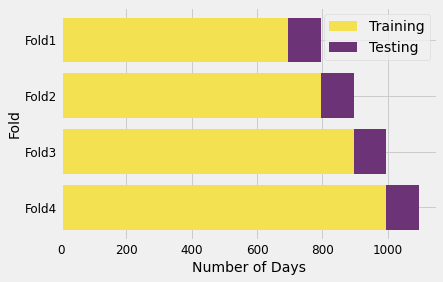

In [25]:
import matplotlib.pyplot as plt
Fold= ["Fold4","Fold3","Fold2","Fold1"]  
Training= [995,895,795,695]  
Testing= [100,100,100,100]

plt.barh(Fold,Training, color="#f3e151")  
# careful: notice "bottom" parameter became "left"
plt.barh(Fold,Testing, left=Training, color="#6c3376")

# we also need to switch the labels
plt.xlabel('Number of Days')  
plt.ylabel('Fold')
plt.legend(['Training', 'Testing'], loc='upper right')
plt.show()

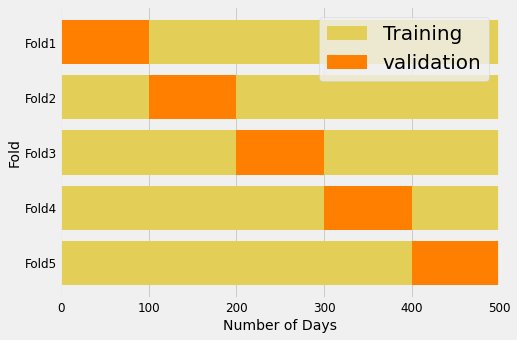

In [26]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
Fold= ["Fold5","Fold4","Fold3","Fold2","Fold1"]  
Training1= [400,300,200,100,0]  
Testing= [100,100,100,100,100]
Training2=[0,100,200,300,400,]

plt.barh(Fold,Training1, color='#E3CF57')  
# careful: notice "bottom" parameter became "left"
plt.barh(Fold,Testing, left=Training1, color="#FF7F00")
plt.barh(Fold,Training2,left=[i+j for i,j in zip(Training1, Testing)], color='#E3CF57')
# we also need to switch the labels
plt.xlabel('Number of Days')  
plt.ylabel('Fold')
plt.legend(['Training', 'validation'], loc='upper right',fontsize=20)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("cv.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [27]:
def Cross_valid(data):
    fold1_train=data[0:695]
    fold1_test=data[695:795]
    fold2_train=data[0:795]
    fold2_test=data[795:895]
    fold3_train=data[0:895]
    fold3_test=data[895:995]
    fold4_train=data[0:995]
    fold4_test=data[995:1095]
    train=[fold1_train,fold2_train,fold3_train,fold4_train]
    test= [fold1_test,fold2_test,fold3_test,fold4_test]
    return train,test

In [28]:
Cross_valid(y)[0][0]

NameError: name 'y' is not defined

In [29]:
#  Cross Validation ARIMA example
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y, order=(6, 0, 5))
model_fit = model.fit()
# make prediction
y_pred_list= [model_fit.predict(len(Cross_valid(y)[0][i]), len(Cross_valid(y)[0][i])+99) for i in range(4)]
y_test_list=Cross_valid(y)[1]
Smape_loss=[smape_loss(y_pred_list[i], y_test_list[i]) for i in range(4)]
Smape_loss

NameError: name 'y' is not defined

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# fit model
model = SARIMAX(y, order=(2, 0, 2), seasonal_order=(0, 0, 0, 12))
model_fit = model.fit(disp=False)
# make prediction
y_pred = model_fit.predict(len(y_train), len(y_train)+199)
fig= plt.figure(figsize=(20,8))

plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date')
plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred,y_test)

NameError: name 'y' is not defined

In [31]:
forecaster = ExponentialSmoothing(trend="add", seasonal='add', sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date')
plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

NameError: name 'ExponentialSmoothing' is not defined

The exponential smoothing of state space model can also be automated similar
 to the [ets](https://www.rdocumentation.org/packages/forecast/versions/8.13/topics/ets) function in R.

In [ ]:
from sktime.forecasting.ets import AutoETS
forecaster = AutoETS(auto=False, sp=12, n_jobs=-1)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date')
plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

Another common model is the ARIMA model. In `sktime`, we interface [`pmdarima`](https://github.com/alkaline-ml/pmdarima), a package for automatically selecting the best ARIMA model. This since searches over a number of possible model parametrisations, it may take a bit longer.

In [ ]:
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

BATS and TBATS are two other time series forecasting algorithms that are contained in `sktime` by means of wrapping the package [`tbats`](https://github.com/intive-DataScience/tbats).

In [ ]:
from sktime.forecasting.bats import BATS

forecaster = BATS(sp=12, use_trend=True, use_box_cox=False)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date')
plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

In [ ]:
y_train

### Detrending
Note that so far the reduction approach above does not take any seasonal or trend into account, but we can easily specify a pipeline which first detrends the data.

`sktime` provides a generic detrender, a transformer which uses any forecaster and returns the in-sample residuals of the forecaster's predicted values. For example, to remove the linear trend of a time series, we can write:

In [ ]:
# liner detrending
forecaster = PolynomialTrendForecaster(degree=1)
transformer = Detrender(forecaster=forecaster)
yt = transformer.fit_transform(y_train)

# internally, the Detrender uses the in-sample predictions
# of the PolynomialTrendForecaster
forecaster = PolynomialTrendForecaster(degree=1)
fh_ins = -np.arange(len(y_train))  # in-sample forecasting horizon
y_pred = forecaster.fit(y_train).predict(fh=fh_ins)

plot_series(y_train, y_pred, yt, labels=["y_train", "fitted linear trend", "residuals"]);

## Prediction intervals
So far, we've only looked at point forecasts. In many cases, we're also interested in prediction intervals. `sktime`'s interface support prediction intervals, but we haven't implemented them for all algorithms yet.

Here, we use the Theta forecasting algorithm:

In [ ]:
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)
alpha = 0.05  # 95% prediction intervals
y_pred, pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)
fig, ax = plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    pred_ints["lower"],
    pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{1 - alpha}% prediction intervals",
)
ax.legend();
smape_loss(y_test, y_pred)

## Forecasting with fbprophet ##

In [ ]:
import pandas as pd
data1=pd.read_csv("Data_2017.csv")
data2=pd.read_csv("Data_2018.csv")
data3=pd.read_csv("Data_2019.csv")
p_id1=data1['pollutant_id'].to_list()
date1=data1['date_time'].to_list()
p_value1=data1['pollutant_value'].to_list()

p_id2=data2['pollutant_id'].to_list()
date2=data2['date_time'].to_list()
p_value2=data2['pollutant_value'].to_list()
p_id3=data3['pollutant_id'].to_list()
date3=data3['date_time'].to_list()
p_value3=data3['pollutant_value'].to_list()

p_id=p_id1+p_id2+p_id3
date=date1+date2+date3
p_value=p_value1+p_value2+p_value3

date=[date[i] for i in range(len(p_id)) if(p_id[i]==6)]
CO_2017=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6)]

for i in range(len(CO_2017)):
    if (CO_2017[i]=='BDL'):
        CO_2017[i]='nan'
    else:
        pass

for i in range(len(CO_2017)):
    if (CO_2017[i]=='nan'):
        CO_2017[i]='0'
    else:
        pass

        
#CO_2017=[int(CO_2017[i]) for i in range(len(CO_2017))]    
data=[[date[i], CO_2017[i]] for i in range(len(date))] 
data= pd.DataFrame(data, columns = ['Date', 'CO'])
data["CO"] = pd.to_numeric(data["CO"], downcast="float")
column_means = data['CO'].mean()
data['CO'].fillna(column_means)



In [ ]:
#Printing the date upto period 'Day'
data['Date'] = pd.to_datetime(data['Date'])
#Drops all rows with missing values
#data=data.dropna()
#Setting the date column as an index column to allow resampling
data=data.set_index('Date')
#Resampling data to give only the mean daily CO concentrations
data=data.resample('D').mean()
data['date'] = data.index
#data['date'] = pd.to_datetime(data['date']).dt.to_period('D')
#mean_value=data['CO'].mean()
data['CO'].values

In [ ]:
from warnings import simplefilter

import numpy as np
import pandas as pd

from sktime.datasets import load_airline
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    ReducedRegressionForecaster,
    TransformedTargetForecaster,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series

simplefilter("ignore", FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric


In [ ]:
import math
#Deriving the lists of Date and CO columns of the data
Date=data['date'].to_list()
CO  =data['CO'].to_list()
date=[i+1 for i in range(len(CO)) ]
#CO=[math.log(CO[i]) for i in range(len(CO))]
#Generating timeseries data based on the two lists
data1= pd.Series(CO,Date)
#CO=pd.Series(CO)


In [ ]:
ts=200
z_train, z_test = temporal_train_test_split(data1, test_size=ts)
Date_train, Date_test = temporal_train_test_split(Date, test_size=ts)
date=Date_train
z=list(z_train)
len(Date_train)

In [ ]:
data2=[[ z[i],date[i]] for i in range(len(z))] 
data2= pd.DataFrame(data2, columns = ['y', 'ds'])

#data['ds']=pd.DatetimeIndex(data['date'])
data2.dtypes
data2['ds']=pd.to_datetime(data2.ds)

In [ ]:
train=data2[:895]
test=data2[895:]

## Useful resources
https://towardsdatascience.com/a-quick-start-of-time-series-forecasting-with-a-practical-example-using-fb-prophet-31c4447a2274

https://sailajakarra.medium.com/facebook-prophet-for-time-series-cf26be1be274#:~:text=Facebook%20Prophet%20uses%20an%20elegant,along%

## Model ##

In [ ]:
from fbprophet import Prophet
m=Prophet(growth='linear',interval_width=0.95,seasonality_mode='additive', yearly_seasonality=False,
          weekly_seasonality=False,daily_seasonality=True )
m.add_seasonality(name='monthly', period=30.5, fourier_order=30, prior_scale=10,mode='additive')
m.add_seasonality(name='weakly', period=7, fourier_order=40, prior_scale=15,mode='additive')
m.add_seasonality(name='daily', period=1, fourier_order=10, prior_scale=15,mode='additive')
m.add_seasonality(name='yearly', period=365.25, fourier_order=25, prior_scale=15,mode='additive')
m.add_seasonality(name='quarterly', period=365.25/4, fourier_order=22, prior_scale=15,mode='additive')
model=m.fit(train)

In [ ]:
future=m.make_future_dataframe(periods=200,freq='D')
forecast=m.predict(future)
pred=forecast['yhat'].to_list()
pred= pd.Series(pred,Date)
forecast.head()

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8))
plt.plot(data1,color='blue',linewidth=2)
#plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(pred,color='orange',linewidth=2)
plt.legend(['real','y_pred'], loc='upper right')
#plt.xlabel('Days from Jan 9th to Nov 9th')
#plt.ylabel( 'CO concentrationCO (μg/m3)')
plt.grid(True)

In [ ]:
z_pred=forecast.iloc[895:,:]
z_pred=z_pred['yhat'].to_list()
z_pred= pd.Series(z_pred,Date_test)


In [ ]:
fig= plt.figure(figsize=(20,8))
plt.plot(z_train,color='blue',linewidth=2)
plt.plot(z_test,color='orange',linewidth=2)
plt.plot(z_pred,color='green',linewidth=2)
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(z_pred, z_test)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
fig=m.plot_components(forecast)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from ipywidgets import IntProgress

# Initial training period.
initial= 600
initial= str(initial)+' days'
#Period length that we perform the cross validation for.
period= 100
period=str(period)+' days'
#Horizon of prediction essentially for each fold.
horizon = 200
horizon=str(horizon)+' days'
fb_cv=cross_validation(m,initial=initial,period=period,
horizon=horizon,parallel="processes")
# Performance Metrics of fb_cv
performance_metrics(fb_cv)

In [ ]:
fb_cv.head()

In [ ]:
plot_cross_validation_metric(fb_cv,'mape');

In [ ]:
# changing trend points
from fbprophet.plot import add_changepoints_to_plot
fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
# Python
#import itertools
#import numpy as np
#import pandas as pd
#cutoffs = pd.to_datetime(['2018-02-15', '2018-08-15', '2019-02-15'])
#param_grid = {  
    #'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    #'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
#}

# Generate all combinations of parameters
#all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
#rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
#for params in all_params:
    #m = Prophet(**params,daily_seasonality=True).fit(train)  # Fit model with given params
    #df_cv = cross_validation(m, cutoffs=cutoffs, horizon='200 days', parallel=None)
    #df_p = performance_metrics(df_cv, rolling_window=1)
    #rmses.append(df_p['rmse'].values[0])

# Find the best parameters
#tuning_results = pd.DataFrame(all_params)
#tuning_results['rmse'] = rmses
#print(tuning_results)

In [ ]:
#best_params = all_params[np.argmin(rmses)]
#print(best_params)

## Forecasting with LSTM ##

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data=[(CO[i]-min(CO))/(max(CO)-min(CO)) for i in range(len(CO))]

len(data)

In [ ]:
data_train, data_test = temporal_train_test_split(data, test_size=200)

In [ ]:
#data=np.array(ts_data)
#scaler=MinMaxScaler(feature_range=(0,1))
#scaled_data=scaler.fit_transform(ts_data)

In [ ]:
def prepare_data(ts_data,n_steps):
    X,y=[],[]
    for i in range(len(ts_data)):
        end_ix=i+n_steps
        if end_ix>len(ts_data)-1:
            break
        seq_x,seq_y=ts_data[i:end_ix],ts_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)
    

In [ ]:
import math
CO_train, CO_test = temporal_train_test_split(CO, test_size=200)
ts_data=CO_train

n_steps=20

X,y=prepare_data(data_train,n_steps)


In [ ]:
#print(X),print(y)

In [ ]:
# Reshape from [samples,timesteps] to [samples,timesteps,features]
n_features=1
X=X.reshape(X.shape[0],X.shape[1],n_features)
y=y.reshape(X.shape[0],n_features)


# Building LSTM Model ####

In [ ]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dense, Dropout
model = Sequential()
# 50 neurons in first hidden layer
model.add(LSTM(units=200, input_shape=(X.shape[1], X.shape[2]), activation='tanh'))
model.add(Dense(units=100,activation='tanh'))
model.add(Dense(units=20,activation='tanh'))
model.add(Dense(1,kernel_initializer='normal', activation='linear'))
model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(lr=0.01))

model.fit(X,y,epochs=100,verbose=1)

In [ ]:
import numpy as np
test_data=[data[i] for i in range(895,1095)]
X_test=[]
y_test=[CO[i] for i in range(905,1095)]
y_test=np.array(y_test)
for i in range(10, len(test_data)):
    X_test.append(test_data[i-10:i])
Y_test=np.array(y_test)
y_test.shape

In [ ]:
X_test=np.array(X_test)
X_test.shape

X_test=np.reshape(X_test,(190,10,1))
X_test.shape

In [ ]:
y_pred=model.predict(X_test)
#y_pred=y_pred.reshape(y_test.shape)

In [ ]:
y_pred=[y_pred[i]*(max(CO)-min(CO))+min(CO) for i in range(190)]


In [ ]:
Date_test=[i for i in range(190)]


In [ ]:
x1=[i for i in range(895)]
x2=[i for i in range(895,1085)]
fig= plt.figure(figsize=(20,8))
plt.plot(x1,CO_train, color='blue')
plt.plot(x2,y_pred,color='green')
plt.plot(x2,Y_test,color='orange')
plt.legend(['y_train','y_pred', 'y_test'], loc='upper right')
plt.xlabel('Date',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
plt.show()
y_pred=[sum(list(y_pred[i])) for i in range(190)]
y_test= pd.Series(y_test,Date_test)
y_pred= pd.Series(y_pred,Date_test)
smape_loss(y_pred, y_test)

### Forecasting with XGBoost ##

In [ ]:
data= pd.DataFrame(CO, columns = [ 'CO'])
data.head()

In [ ]:
data["target"]=data.CO.shift(-1)

In [ ]:
data.dropna(inplace=True)

In [ ]:
def train_test_split(data,perc):
    data=data.values
    n=int(len(data)*(1-perc))
    return data[:n],data[n:]


In [ ]:
train, test = train_test_split(data,200/1093)
X=train[:,:-1]
y=train[:,-1]


In [ ]:
from xgboost import XGBRegressor
model=XGBRegressor(objective="reg:squarederror",n_estimators=100)
model.fit(X,y)

In [ ]:
test[2]

In [ ]:
val=np.array(test[3,0]).reshape(1,-1)
pred=model.predict(val)
pred[0]

## Work forward validation ## 

In [ ]:
def xgb_predict(train,val):
    train=np.array(train)
    X,y=train[:,:-1],train[:,-1]
    model=XGBRegressor(objective="reg:squarederror",n_estimators=500)
    model.fit(X,y)
    val=np.array(val).reshape(1,-1)
    pred=model.predict(val)
    return pred[0]
    

In [ ]:
from sklearn.metrics import mean_squared_error
def validate(data,perc):
    predictions=[]
    train, test = train_test_split(data,perc)
    history=[x for x in train]
    for i in range(len(test)):
        test_X,test_y=test[i,:-1],test[i,-1]
        pred=xgb_predict(history,test_X[0])
        predictions.append(pred)
        history.append(test[i])
    error=mean_squared_error(test[:,-1],predictions,squared=False)
    return error, test[:,-1] ,predictions  
    

In [ ]:
%%time
rmse,y,pred=validate(data,200/1093)
print(rmse)

In [ ]:
ind=[i for i in range(201)]
y_pred= pd.Series(pred,ind)
y_test= pd.Series(y,ind)
fig= plt.figure(figsize=(20,8))
plt.plot(y_pred,color='darkgreen')
plt.plot(y_test,color='darkorange')
plt.legend(['y_pred','y_test'], loc='upper right')
plt.xlabel('Forecast horizon(days)',fontsize=18)
plt.ylabel( 'CO concentrationCO (μg/m3)',fontsize=18)
plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

## Summary

As we have seen, in order to make forecasts, we need to first specify (or build) a model, then fit it to the training data, and finally call predict to generate forecasts for the given forecasting horizon.

* `sktime` comes with several forecasting algorithms (or forecasters) and tools for composite model building. All forecaster share a common interface. Forecasters are trained on a single series of data and make forecasts for the provided forecasting horizon.

* `sktime` has a number of statistical forecasting algorithms, based on implementations in statsmodels. For example, to use exponential smoothing with an additive trend component and multiplicative seasonality, we can write the following.


## Useful resources
* For more details, take a look at [our paper on forecasting with sktime](https://arxiv.org/abs/2005.08067) in which we discuss the forecasting API in more detail and use it to replicate and extend the M4 study.
* For a good introduction to forecasting, see [Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice. OTexts, 2018](https://otexts.com/fpp2/).
* For comparative benchmarking studies/forecasting competitions, see the [M4 competition](https://www.sciencedirect.com/science/article/pii/S0169207019301128) and the currently running [M5 competition](https://www.kaggle.com/c/m5-forecasting-accuracy/overview).

In [ ]:
import xlwt
from tempfile import TemporaryFile
book = xlwt.Workbook()
sheet1 = book.add_sheet('sheet1')

supersecretdata = CO

for i,e in enumerate(supersecretdata):
    sheet1.write(i,1,e)

name = "random.xls"
book.save(name)
book.save(TemporaryFile())